# Análise Linguística de Texto com spaCy

**Objetivo:**  
Explorar características linguísticas do discurso *I Have a Dream* por meio de análise morfossintática e reconhecimento de entidades.

**Texto analisado:**  
Trechos retirados do discurso *"I Have a Dream"* – Martin Luther King Jr.

**Bibliotecas:**
- Collections
- Matplotlib
- spaCy

### Importando bibliotecas, carregando spaCy e adicionando texto escolhido em uma variável.

In [ ]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
texto = open('/content/dream.txt').read()
doc = nlp(texto)

### Analise de distribuição de classe gramatical
Etapas:
- Extração das classes gramaticais
- Contagem de frequências
- Visualização

In [ ]:
pos_counts = Counter(
    token.pos_
    for token in doc
    if token.is_alpha
)

pos_counts.most_common()

[('NOUN', 46),
 ('ADP', 28),
 ('VERB', 23),
 ('DET', 20),
 ('ADJ', 19),
 ('AUX', 15),
 ('PRON', 14),
 ('ADV', 12),
 ('PROPN', 10),
 ('PART', 8),
 ('NUM', 3),
 ('CCONJ', 3),
 ('SCONJ', 1)]

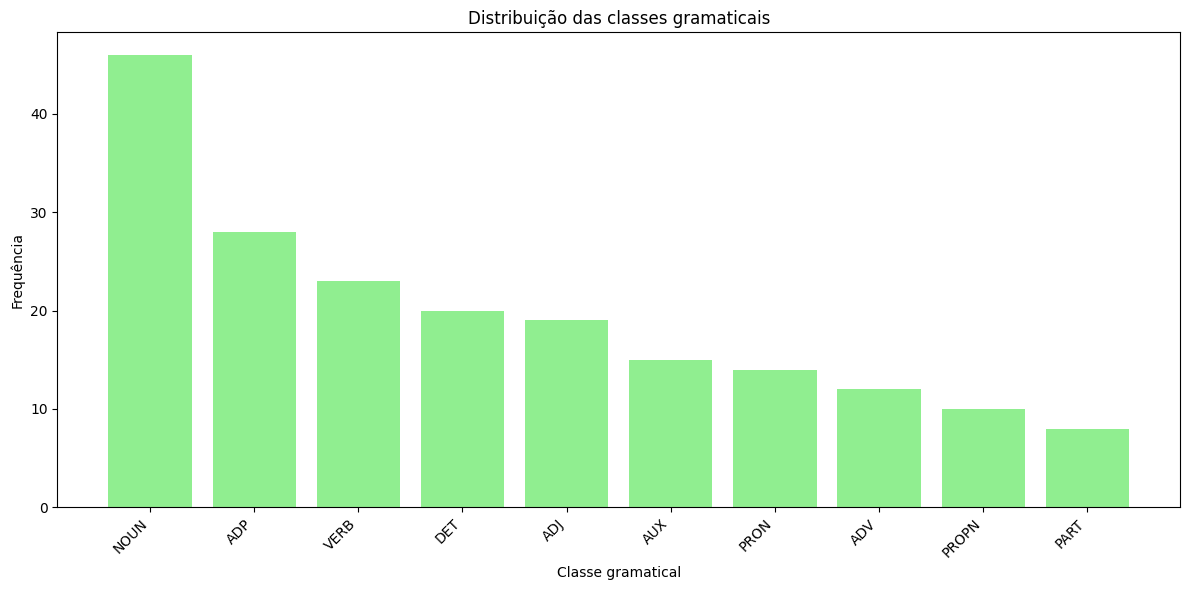

In [ ]:
rotulos, valores = zip(*pos_counts.most_common(10))

plt.figure(figsize=(12, 6))
plt.bar(rotulos, valores, color='lightgreen')
plt.title(f'Distribuição das classes gramaticais')
plt.xlabel('Classe gramatical')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A análise da distribuição das classes gramaticais mostra predominância de substantivos (NOUN = 46), preposições (ADP = 28) e verbos (VERB = 23).<br>
Esse padrão sugere um texto com foco em conceitos e entidades, articulados por relações semânticas frequentes e acompanhados de ações ou processos.

### Análise de Dependência Sintática

Etapas:
- Extração das classes gramaticais
- Contagem de frequências
- Visualização

In [ ]:
dep_counts = Counter(
    token.dep_
    for token in doc
    if token.is_alpha and not token.is_stop
)

dep_counts.most_common()

[('ROOT', 27),
 ('pobj', 23),
 ('amod', 13),
 ('dobj', 6),
 ('compound', 5),
 ('nsubj', 4),
 ('acomp', 3),
 ('nsubjpass', 2),
 ('xcomp', 2),
 ('advcl', 2),
 ('ccomp', 2),
 ('conj', 2),
 ('prep', 1),
 ('advmod', 1),
 ('attr', 1),
 ('npadvmod', 1),
 ('poss', 1)]

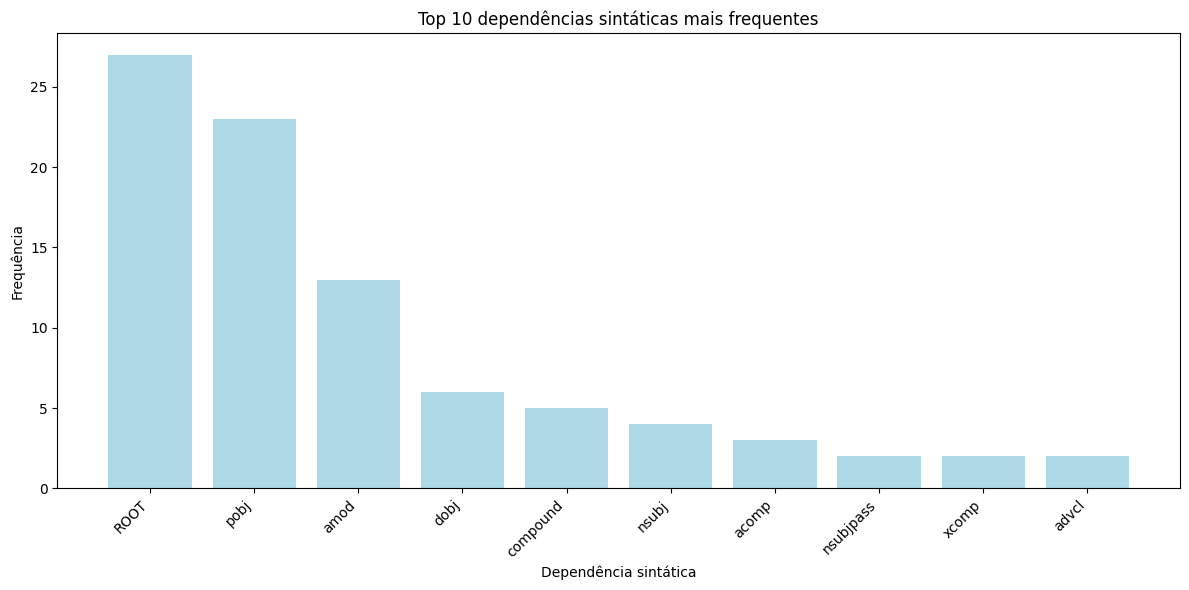

In [ ]:
dependencias, frequencias = zip(*dep_counts.most_common(10))

plt.figure(figsize=(12, 6))
plt.bar(dependencias, frequencias, color='lightblue')
plt.title('Dependências sintáticas mais frequentes')
plt.xlabel('Dependência sintática')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A análise das dependências sintáticas revela predominância de raiz da oração (ROOT = 27), objeto de preposição (pobj = 23) e modificador adjetival (amod = 13).<br>
Esse resultado indica que o texto apresenta uma estrutura sintática bem definida, com forte presença de núcleos oracionais, uso frequente de complementos preposicionados e ênfase na qualificação de substantivos.

### Analise de entidades

In [ ]:
entidades = []
entidades_por_tipo = Counter()

for ent in doc.ents:
    entidades.append((ent.text, ent.label_))
    entidades_por_tipo[ent.label_] += 1

print("Entidades encontradas:")
print(entidades)

print("\nQuantidade por tipo:")
print(entidades_por_tipo)


Entidades encontradas:
[('Justice', 'ORG'), ('One hundred years later', 'DATE'), ('Negro', 'ORG'), ('Mississippi', 'GPE'), ('Alabama', 'GPE'), ('Georgia', 'GPE'), ('four', 'CARDINAL'), ('Stone Mountain', 'ORG')]

Quantidade por tipo:
Counter({'ORG': 3, 'GPE': 3, 'DATE': 1, 'CARDINAL': 1})


A análise de entidades nomeadas indica predominância dos tipos organização (ORG = 3) e entidade geopolítica (GPE = 3), evidenciando um texto contextualizado em instituições, grupos sociais e locais específicos.<br>
Esse conjunto de entidades reforça o caráter histórico-social do texto, com foco em contextos institucionais e geográficos relevantes para a construção do discurso.

# Considerações
Enquanto a análise estatística realizada com o NLTK se concentra na frequência e distribuição de termos, o uso do spaCy possibilitou uma análise estrutural mais aprofundada do discurso “I Have a Dream”, incluindo classes gramaticais, relações sintáticas e entidades nomeadas.<br>
Essas análises evidenciaram o caráter argumentativo e histórico do texto, marcado pelo uso recorrente de substantivos, verbos e estruturas sintáticas claras, além de referências a instituições e locais específicos. Dessa forma, a combinação das duas abordagens demonstra como diferentes técnicas de Processamento de Linguagem Natural podem ser utilizadas de maneira complementar para compreender não apenas o conteúdo lexical, mas também a organização linguística e discursiva do texto.